# Network Infrastructure Risk Recommender System (Complete)

This notebook demonstrates how to build and test a predictive recommender for risk mitigation actions in network infrastructure projects. 

- Loads your risk register CSV
- Encodes categorical features for ML
- Trains a simple Nearest Neighbors recommender
- Tests recommendation on a sample risk
- Optionally generates recommendations for all risks
- Exports results for Power BI or other tools
- Includes a simple visualization of recommendations

----

In [1]:
# Install dependencies if needed (uncomment for Colab)
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Your Risk Register Data

In [2]:
# Replace with your actual filename
df = pd.read_csv('network_infrastructure_waterfall_risk_register_Version2.csv')
df.head()

Telecom Sector Project Management Methodology  Risk Category  \
0  Network Infrastructure                      Waterfall     Regulatory   
1  Network Infrastructure                      Waterfall      Financial   
2  Network Infrastructure                      Waterfall    Operational   
3  Network Infrastructure                      Waterfall      Technical   
4  Network Infrastructure                      Waterfall  Environmental   

        Risk Type                                   Risk Description  \
0      Compliance    Failure to meet new data protection regulations   
1  Budget Overrun  Unexpected cost increases in hardware procurement   
2  System Failure           Frequent outages due to outdated routers   
3    Software Bug  Critical bug found in network management software   
4           Flood                  Flood risk to underground cabling   

           Risk Owner Severity Likelihood  Impact Score       Status  \
0  Compliance Manager     High     Medium             8         Open   
1        Finance Lead   Medium        Low             6         Open   
2    Network Engineer     High       High             9  In Progress   
3          IT Manager     High     Medium             8         Open   
4  Facilities Manager     High        Low             7         Open   

               Recommended Action        RMS Step  
0        Conduct compliance audit  Identification  
1  Renegotiate supplier contracts  Identification  
2                Upgrade hardware        Analysis  
3                  Patch software        Analysis  
4      Relocate vulnerable assets  Identification

## 2. Encode Categorical Columns for Modeling

In [3]:
categorical_cols = ['Risk Category', 'Risk Type', 'Severity', 'Likelihood', 'Status', 'RMS Step']
encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col + '_enc'] = encoders[col].fit_transform(df[col])
df.head()

Telecom Sector Project Management Methodology  Risk Category  \
0  Network Infrastructure                      Waterfall     Regulatory   
1  Network Infrastructure                      Waterfall      Financial   
2  Network Infrastructure                      Waterfall    Operational   
3  Network Infrastructure                      Waterfall      Technical   
4  Network Infrastructure                      Waterfall  Environmental   

        Risk Type                                   Risk Description  \
0      Compliance    Failure to meet new data protection regulations   
1  Budget Overrun  Unexpected cost increases in hardware procurement   
2  System Failure           Frequent outages due to outdated routers   
3    Software Bug  Critical bug found in network management software   
4           Flood                  Flood risk to underground cabling   

           Risk Owner Severity Likelihood  Impact Score       Status  \
0  Compliance Manager     High     Medium             8         Open   
1        Finance Lead   Medium        Low             6         Open   
2    Network Engineer     High       High             9  In Progress   
3          IT Manager     High     Medium             8         Open   
4  Facilities Manager     High        Low             7         Open   

               Recommended Action        RMS Step  Risk Category_enc  \
0        Conduct compliance audit  Identification                  5   
1  Renegotiate supplier contracts  Identification                  2   
2                Upgrade hardware        Analysis                  4   
3                  Patch software        Analysis                  9   
4      Relocate vulnerable assets  Identification                  1   

   Risk Type_enc  Severity_enc  Likelihood_enc  Status_enc  RMS Step_enc  
0              5             0               2           1             2  
1              2             1               1           1             2  
2             43             0               0           0             0  
3             41             0               2           1             0  
4             15             0               1           1             2

## 3. Prepare Feature Matrix and Actions

In [4]:
feature_cols = [col + '_enc' for col in categorical_cols] + ['Impact Score']
X = df[feature_cols]
# Recommended actions (target to suggest)
actions = df['Recommended Action']

## 4. Train the Recommender and Define Recommendation Function

In [5]:
nn = NearestNeighbors(n_neighbors=3, metric='euclidean')
nn.fit(X)

def recommend_action(risk_dict):
    # Prepare input vector for new risk
    query = []
    for col in categorical_cols:
        val = risk_dict[col]
        # If value not found, fallback to first available
        if val not in encoders[col].classes_:
            val = encoders[col].classes_[0]
        query.append(encoders[col].transform([val])[0])
    query.append(risk_dict['Impact Score'])
    distances, indices = nn.kneighbors([query])
    recommended_actions = actions.iloc[indices[0]].values
    return recommended_actions

## 5. Test the Recommender with a Sample Risk Profile

In [6]:
# Change these values to match your data
sample_risk = {
    'Risk Category': 'Technical',        # Example category
    'Risk Type': 'Software Bug',         # Example risk type
    'Severity': 'High',                  # Must be in your dataset
    'Likelihood': 'Medium',              # Must be in your dataset
    'Impact Score': 8,                   # Numeric
    'Status': 'Open',                    # Must be in your dataset
    'RMS Step': 'Analysis'               # Must be in your dataset
}
rec_actions = recommend_action(sample_risk)
print('Recommended actions for sample risk:')
for action in rec_actions:
    print('-', action)

Recommended actions for sample risk:
- Patch software
- Research new technologies
- Upgrade hardware


C:\Users\hanse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## 6. (Optional) Recommend Actions for All Risks in Dataset

In [7]:
all_recommendations = []
for idx, row in df.iterrows():
    risk_profile = {col: row[col] for col in categorical_cols}
    risk_profile['Impact Score'] = row['Impact Score']
    recs = recommend_action(risk_profile)
    all_recommendations.append(', '.join(recs))

df['Top Recommended Actions'] = all_recommendations
df.head()

C:\Users\hanse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\hanse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\hanse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\hanse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\hanse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\hanse\anaconda3\

Telecom Sector Project Management Methodology  Risk Category  \
0  Network Infrastructure                      Waterfall     Regulatory   
1  Network Infrastructure                      Waterfall      Financial   
2  Network Infrastructure                      Waterfall    Operational   
3  Network Infrastructure                      Waterfall      Technical   
4  Network Infrastructure                      Waterfall  Environmental   

        Risk Type                                   Risk Description  \
0      Compliance    Failure to meet new data protection regulations   
1  Budget Overrun  Unexpected cost increases in hardware procurement   
2  System Failure           Frequent outages due to outdated routers   
3    Software Bug  Critical bug found in network management software   
4           Flood                  Flood risk to underground cabling   

           Risk Owner Severity Likelihood  Impact Score       Status  \
0  Compliance Manager     High     Medium             8         Open   
1        Finance Lead   Medium        Low             6         Open   
2    Network Engineer     High       High             9  In Progress   
3          IT Manager     High     Medium             8         Open   
4  Facilities Manager     High        Low             7         Open   

               Recommended Action        RMS Step  Risk Category_enc  \
0        Conduct compliance audit  Identification                  5   
1  Renegotiate supplier contracts  Identification                  2   
2                Upgrade hardware        Analysis                  4   
3                  Patch software        Analysis                  9   
4      Relocate vulnerable assets  Identification                  1   

   Risk Type_enc  Severity_enc  Likelihood_enc  Status_enc  RMS Step_enc  \
0              5             0               2           1             2   
1              2             1               1           1             2   
2             43             0               0           0             0   
3             41             0               2           1             0   
4             15             0               1           1             2   

                             Top Recommended Actions  
0  Conduct compliance audit, Increase bandwidth, ...  
1  Renegotiate supplier contracts, Increase bandw...  
2  Upgrade hardware, Implement retention programs...  
3  Patch software, Research new technologies, Upg...  
4  Relocate vulnerable assets, Install advanced f...

## 7. Export Results for Power BI, Excel, or CSV

In [8]:
# Export full dataframe with recommendations
df.to_csv('network_risk_recommendations.csv', index=False)
df.to_excel('network_risk_recommendations.xlsx', index=False)
# You can now import these files into Power BI for dashboard/reporting

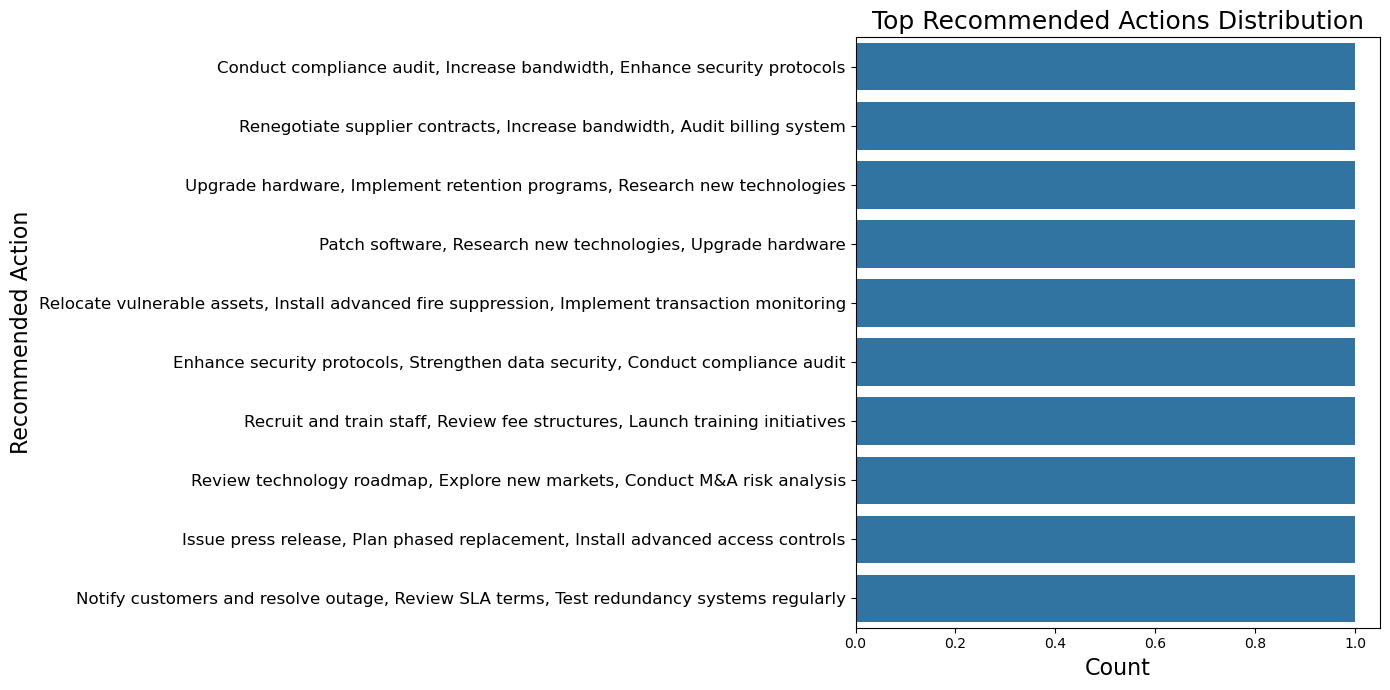

In [17]:
top_actions = df['Top Recommended Actions'].value_counts().head(10)
plt.figure(figsize=(14, 7))
ax = sns.countplot(
    y='Top Recommended Actions',
    data=df[df['Top Recommended Actions'].isin(top_actions.index)],
    order=top_actions.index
)
plt.title('Top Recommended Actions Distribution', fontsize=18)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Recommended Action', fontsize=16)
ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

In [18]:
def truncate_label(label, maxlen=40):
    return label if len(label) <= maxlen else label[:maxlen] + '...'

C:\Users\hanse\AppData\Local\Temp\ipykernel_13052\499017458.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, fontsize=10)


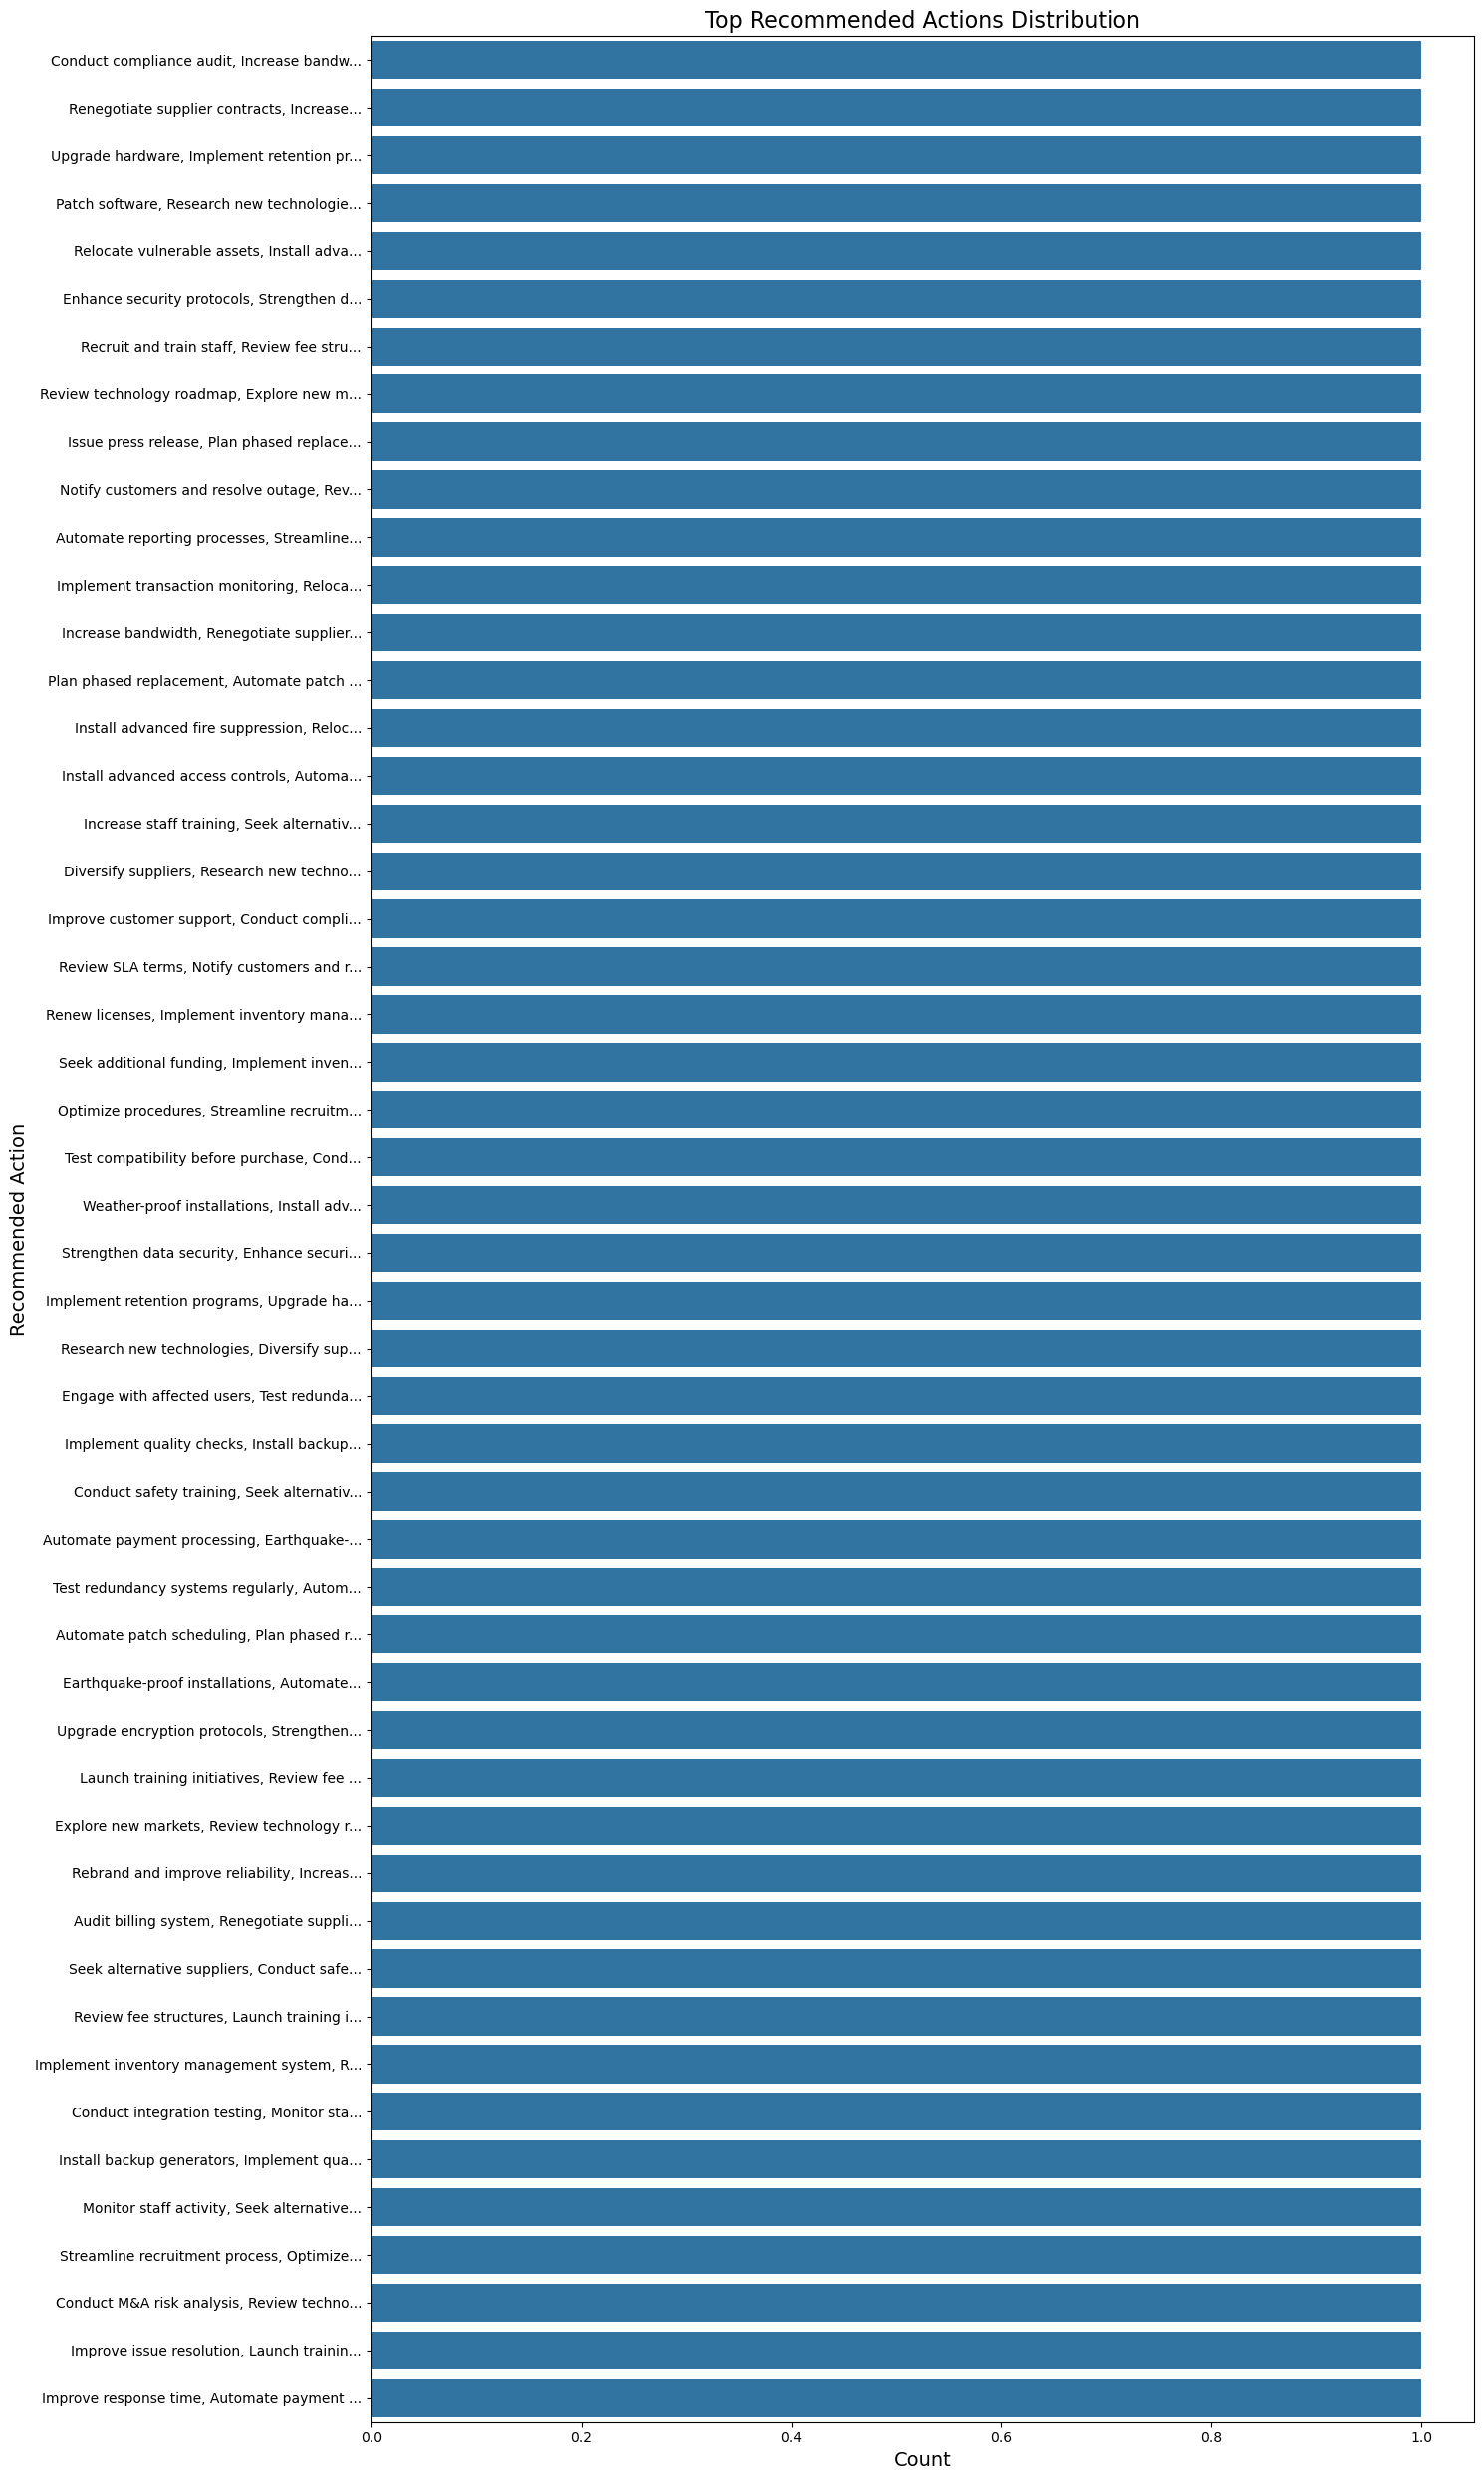

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Truncate labels for clarity
max_label_length = 40
labels = [truncate_label(label, max_label_length) for label in df['Top Recommended Actions'].value_counts().index]

plt.figure(figsize=(15, len(labels) * 0.5))  # Height scales with number of bars

ax = sns.countplot(
    y='Top Recommended Actions',
    data=df,
    order=df['Top Recommended Actions'].value_counts().index
)

# Set truncated labels on y-axis
ax.set_yticklabels(labels, fontsize=10)

plt.title('Top Recommended Actions Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Recommended Action', fontsize=14)
plt.tight_layout()

plt.show()

C:\Users\hanse\AppData\Local\Temp\ipykernel_13052\434143019.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, fontsize=10)


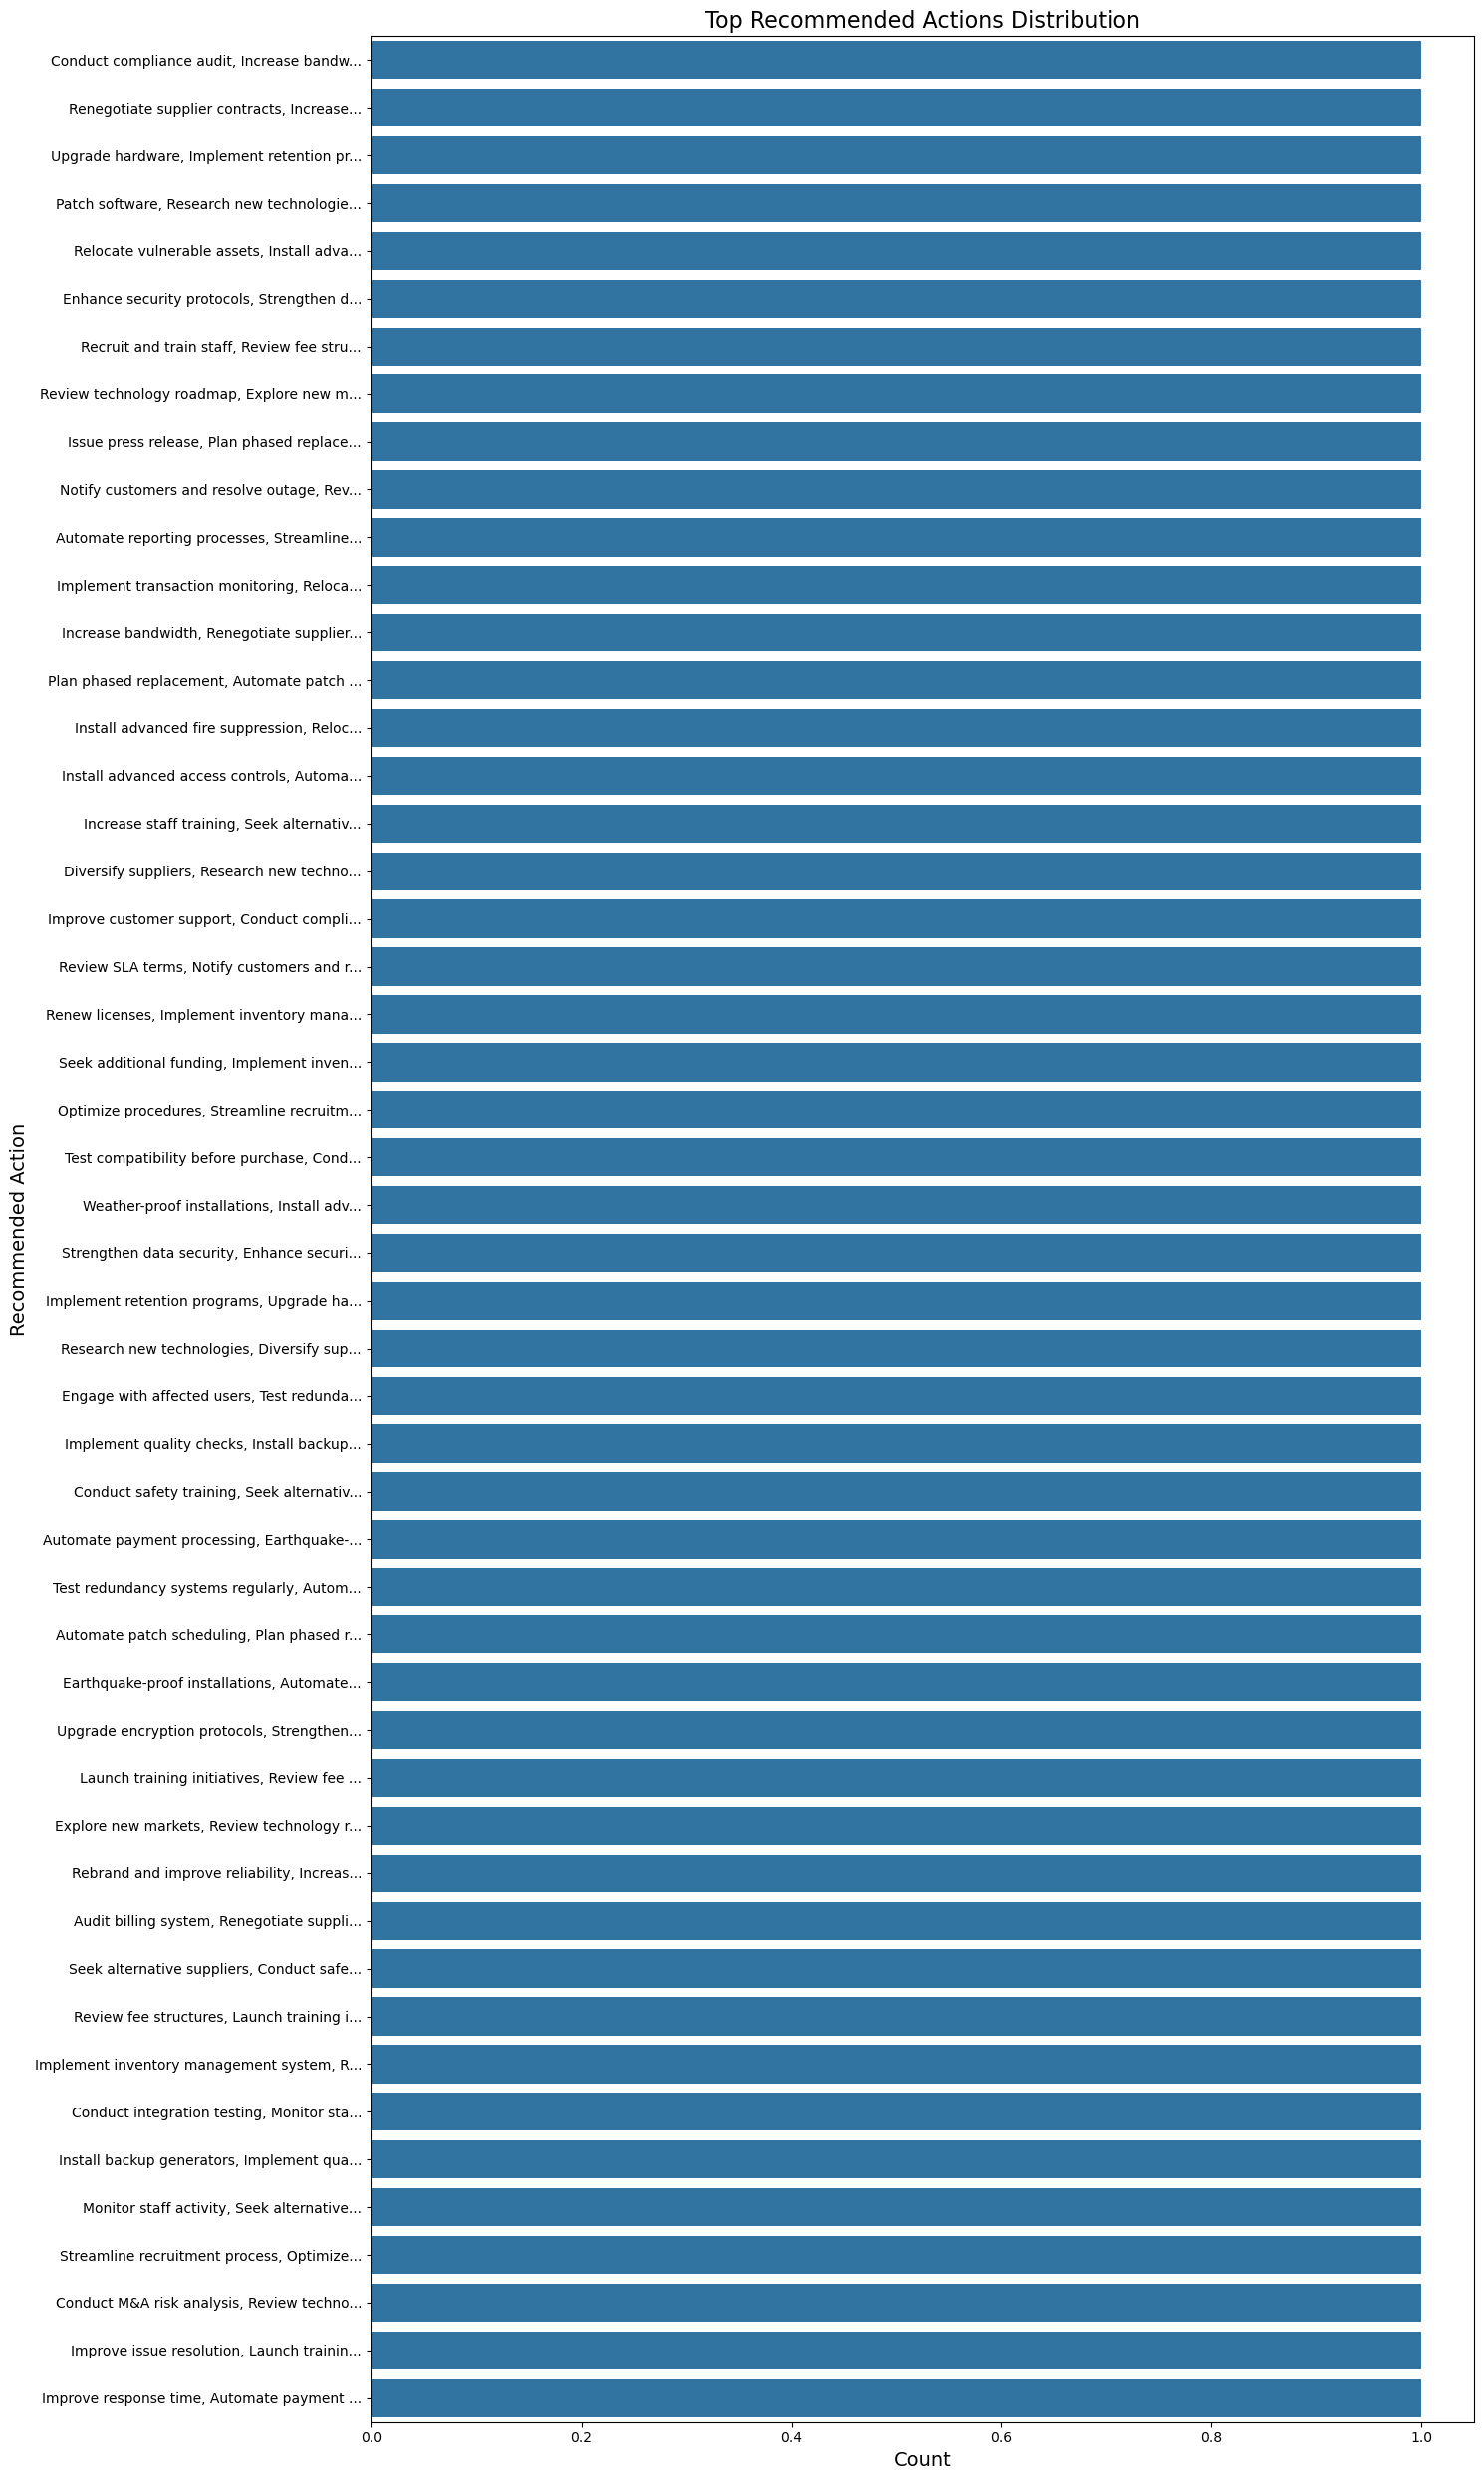

In [20]:
def truncate_label(label, maxlen=40):
    return label if len(label) <= maxlen else label[:maxlen] + '...'

import matplotlib.pyplot as plt
import seaborn as sns

labels = [truncate_label(label) for label in df['Top Recommended Actions'].value_counts().index]

plt.figure(figsize=(15, len(labels)*0.5))  # Height scales with number of bars

ax = sns.countplot(
    y='Top Recommended Actions',
    data=df,
    order=df['Top Recommended Actions'].value_counts().index
)

ax.set_yticklabels(labels, fontsize=10)

plt.title('Top Recommended Actions Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Recommended Action', fontsize=14)
plt.tight_layout()
plt.show()

In [21]:
import textwrap

def wrap_label(label, width=40):
    return '\n'.join(textwrap.wrap(label, width))

C:\Users\hanse\AppData\Local\Temp\ipykernel_13052\2568609685.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(wrapped_labels, fontsize=10)


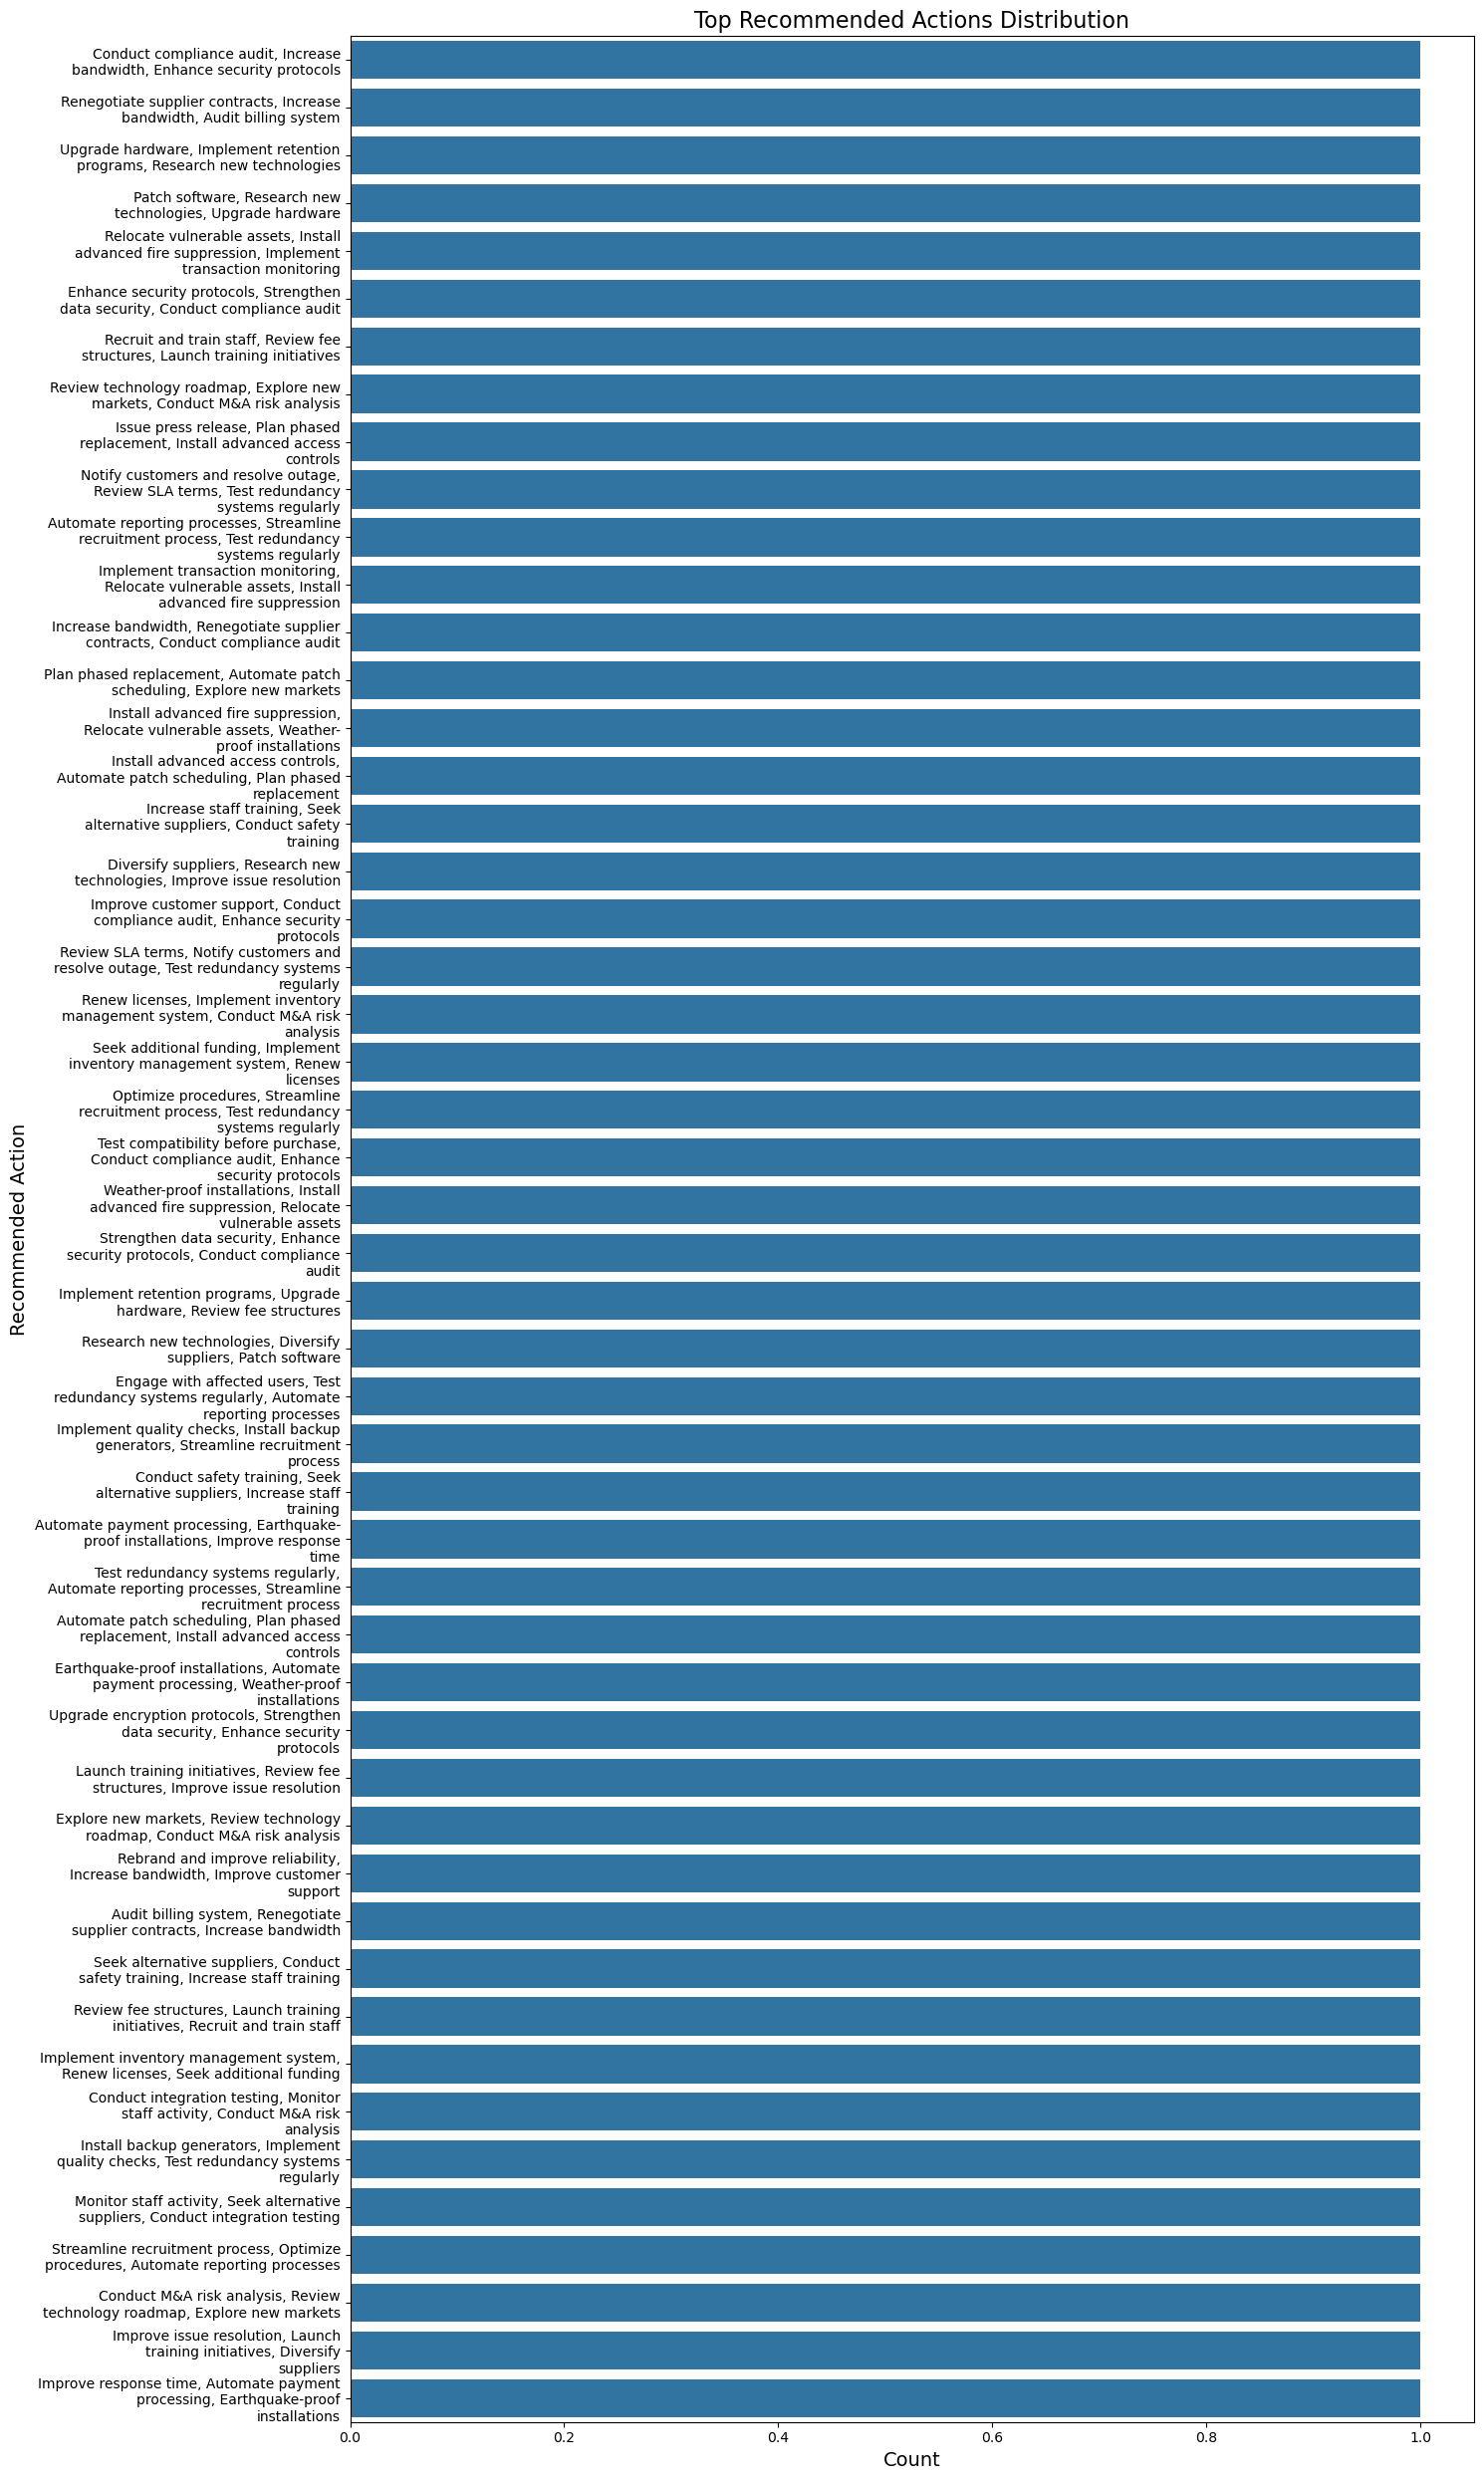

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

def wrap_label(label, width=40):
    return '\n'.join(textwrap.wrap(label, width))

# Get all unique action labels, wrap them for readability
wrapped_labels = [wrap_label(label) for label in df['Top Recommended Actions'].value_counts().index]

plt.figure(figsize=(15, len(wrapped_labels)*0.5))  # Height scales with number of bars

ax = sns.countplot(
    y='Top Recommended Actions',
    data=df,
    order=df['Top Recommended Actions'].value_counts().index
)

ax.set_yticklabels(wrapped_labels, fontsize=10)

plt.title('Top Recommended Actions Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Recommended Action', fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
!pip install plotly

Access is denied.


In [24]:
import plotly
import plotly.express as px

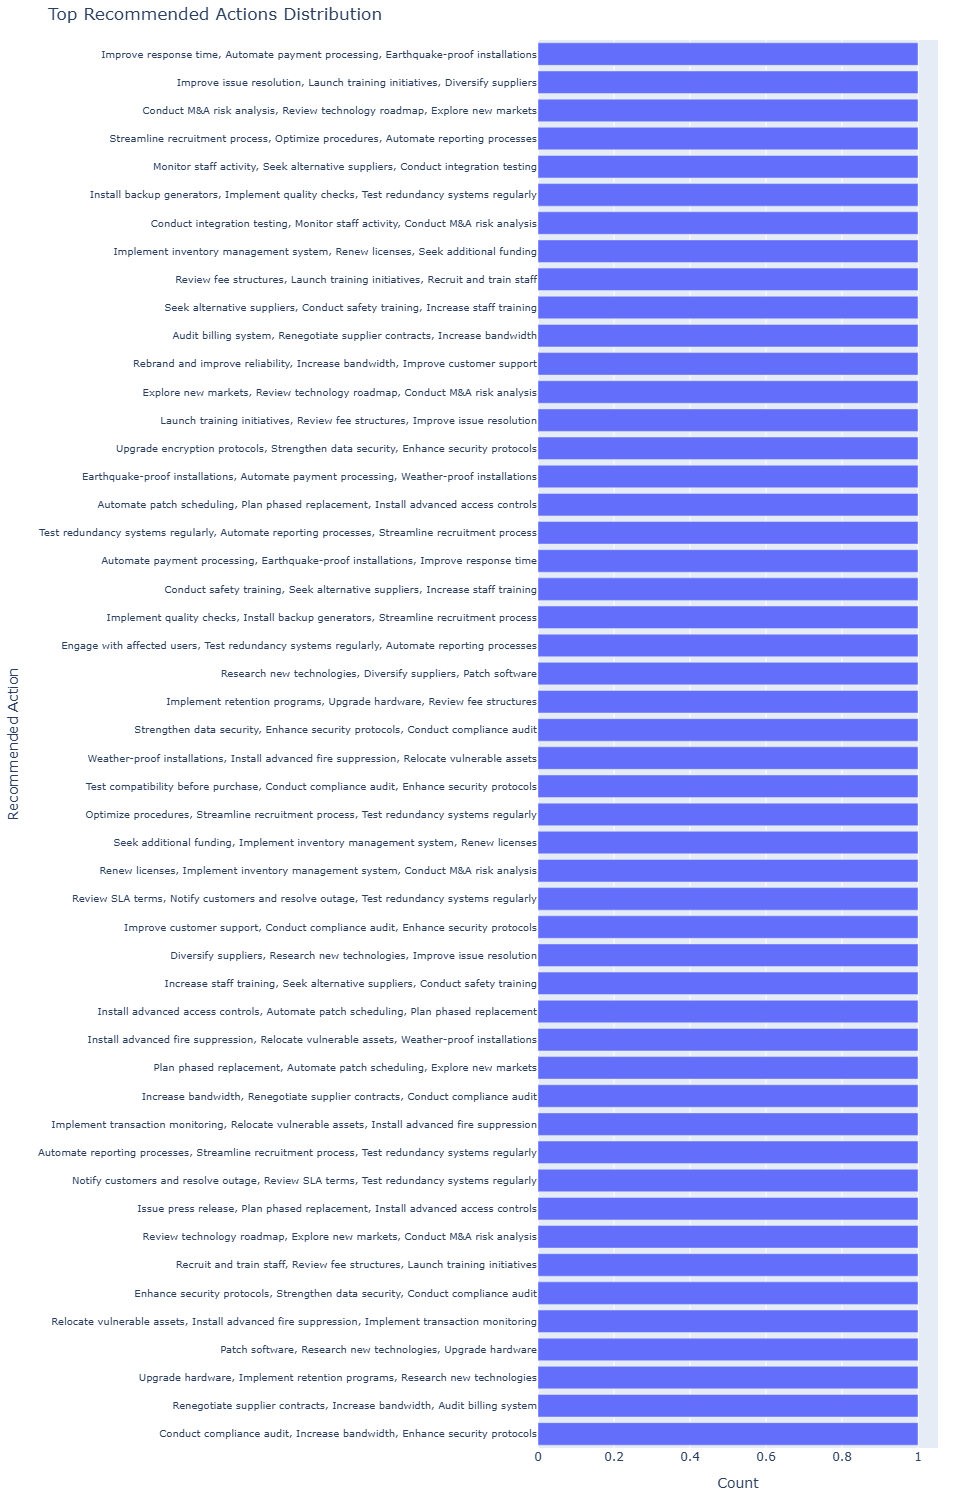

In [25]:
import plotly.express as px

# Get counts for all recommended actions
action_counts = df['Top Recommended Actions'].value_counts()

# Create a DataFrame for Plotly
plot_df = action_counts.reset_index()
plot_df.columns = ['Recommended Action', 'Count']

# Plotly bar chart (horizontal)
fig = px.bar(
    plot_df,
    y='Recommended Action',
    x='Count',
    orientation='h',
    title='Top Recommended Actions Distribution',
    width=1000,
    height=max(600, 30 * len(plot_df))  # Height scales with number of actions
)

fig.update_layout(
    yaxis=dict(tickfont=dict(size=10)),  # Smaller font for many bars
    margin=dict(l=200, r=20, t=40, b=40) # Increase left margin for long labels
)
fig.show()

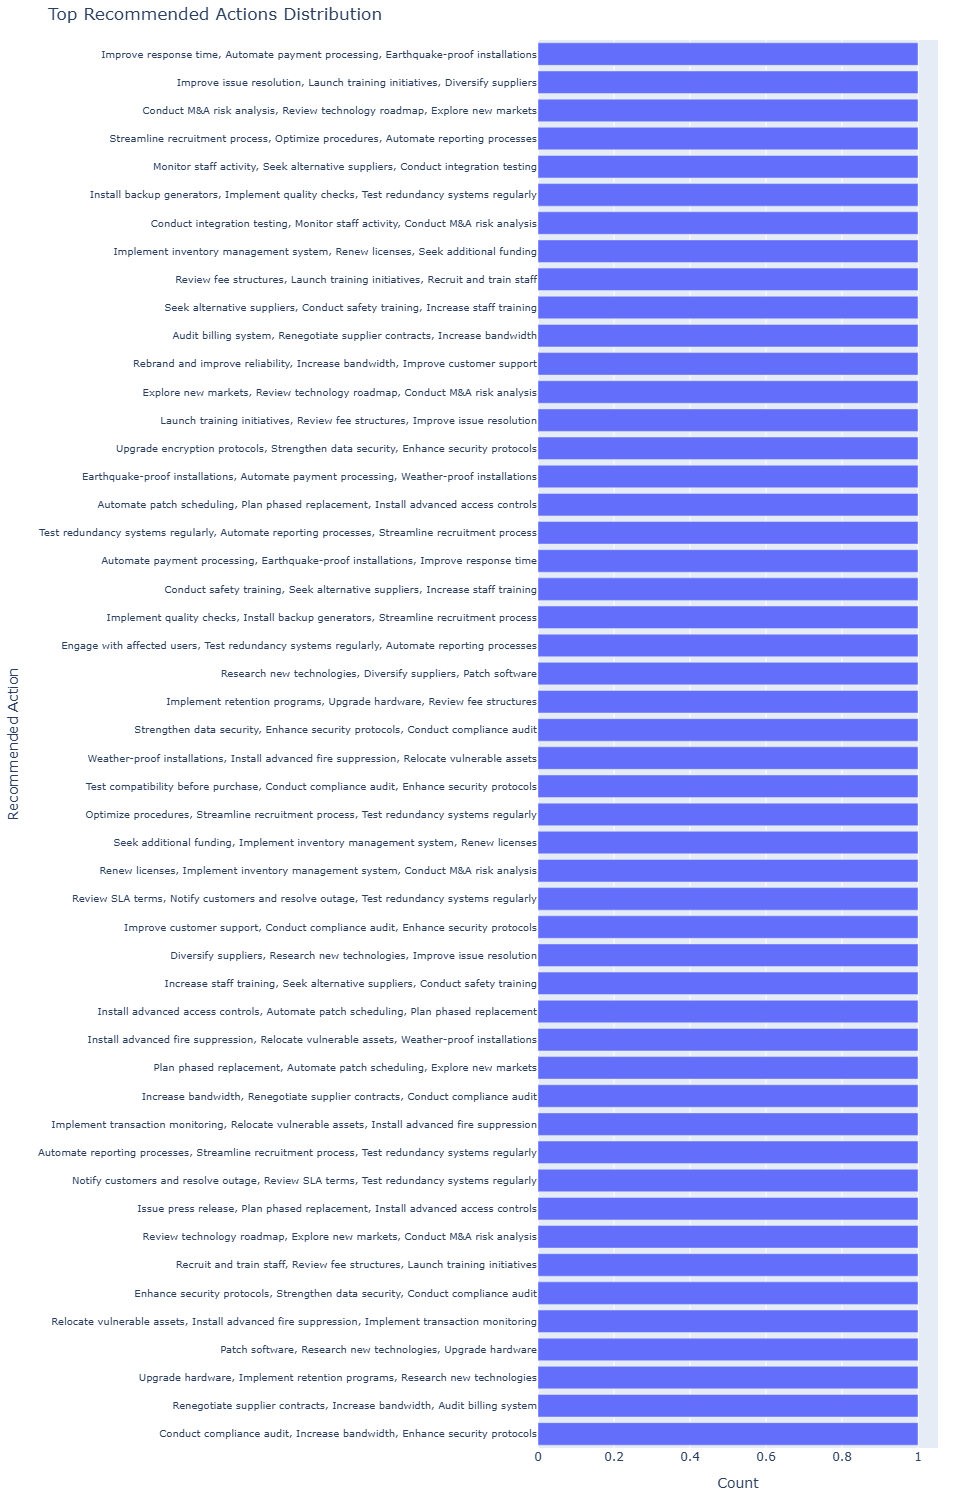

In [26]:
import plotly.express as px

# Get counts for all recommended actions
action_counts = df['Top Recommended Actions'].value_counts()

# Create a DataFrame for Plotly
plot_df = action_counts.reset_index()
plot_df.columns = ['Recommended Action', 'Count']

# Plotly bar chart (horizontal, interactive, with long labels auto-wrapped on hover)
fig = px.bar(
    plot_df,
    y='Recommended Action',
    x='Count',
    orientation='h',
    title='Top Recommended Actions Distribution',
    width=1200,
    height=max(600, 30 * len(plot_df))  # Height scales with number of actions
)

fig.update_layout(
    yaxis=dict(tickfont=dict(size=10)),  # Smaller font for many bars
    margin=dict(l=320, r=20, t=40, b=40) # Increase left margin for long labels
)
fig.show()

## 8. Visualize Top Recommended Actions

----
# Summary
- Loaded risk register and encoded for ML
- Built and tested recommender for mitigation actions
- Exported results for Power BI or analytics
- Visualized results

Expand this notebook with more advanced models, additional features, or direct Power BI integration as needed!